# **Neural Network Digit Classifier**

Developed a neural network using TensorFlow to classify handwritten digits. The model takes input data of shape (5000, 400) representing flattened 20x20 pixel images and outputs predictions of shape (5000, 1) corresponding to the digit labels. The network was trained to achieve high accuracy in recognizing and predicting handwritten digits on unseen data, demonstrating effective feature learning and classification.

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear,sigmoid,softmax


## Loading Dataset

In [5]:
import scipy.io

data = scipy.io.loadmat("ex4data1.mat")
X = data['X']
y = data['y']


In [6]:
X.shape,y.shape

((5000, 400), (5000, 1))

## Plotting random samples with Labels

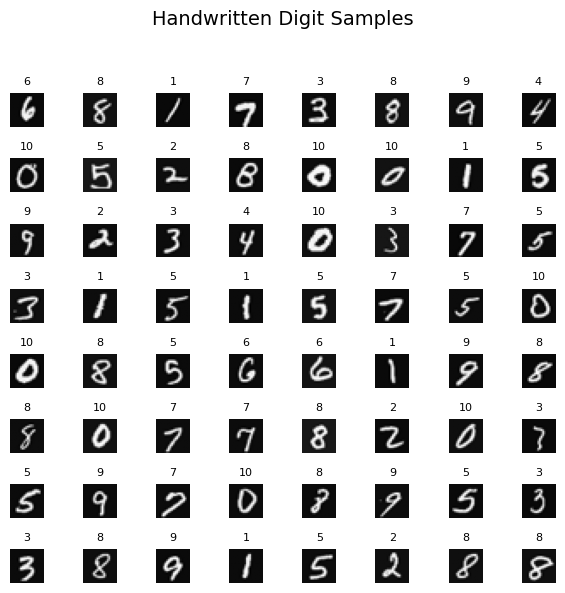

In [ ]:
m = X.shape[0]
rand_indices = np.random.choice(m, 64, replace=False)

# Create figure with 8x8 subplots
fig, axes = plt.subplots(8, 8, figsize=(6,6))
fig.suptitle("Handwritten Digit Samples", fontsize=14)

for i, ax in enumerate(axes.flat):
    # Get image
    img = X[rand_indices[i]].reshape(20, 20).T   # reshape and transpose
    label = int(y[rand_indices[i], 0])

    # Plot image
    ax.imshow(img, cmap='gray')
    ax.set_title(label, fontsize=8)
    ax.set_axis_off()

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

### Training the Model

In [17]:
model = Sequential ([
    tf.keras.Input(shape=(400,)),
    Dense(25,activation='relu',name='layer1'),
    Dense(15,activation='relu',name='layer2'),
    Dense(11,activation='linear',name='layer3')
    ])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 11)             │           176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,591 (41.37 KB)

 Trainable params: 10,591 (41.37 KB)

 Non-trainable params: 0 (0.00 B)

### Weights and Shapes of Different Layers

In [19]:
[layer1, layer2, layer3] = model.layers

In [20]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 11), b3 shape = (11,)


In [21]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [22]:
history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0681
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6663
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4034
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3230
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2949
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2653
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2353
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2237
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2039
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1954
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1682
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1771
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1578
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1509
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

----  Model is trained sucessfully

##**Prediction**

In [25]:
t= X[1015]     # its an image of two

In [27]:
prediction = model.predict(t.reshape(1,400))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [28]:
print(prediction)    # it will be a vector

[[-7.492501    5.9105067   6.471752    1.9414182  -5.620733   -5.8193808
  -3.8436773   2.5663943  -4.4382796  -0.83550245 -8.339575  ]]


In [39]:
prediction=tf.nn.softmax(prediction)  # Vector with probalities of digits accorfong to the index
print(prediction)

tf.Tensor(
[[0.09001003 0.0931914  0.09657324 0.09005938 0.09001005 0.09001005
  0.09001018 0.09010252 0.09001011 0.09001309 0.09001003]], shape=(1, 11), dtype=float32)


 We need to find the index of the maximum probability

In [38]:
print("Prediction = ",np.argmax(prediction),", Actual output = ",y[1015][0])

Prediction =  2 , Actual output =  2


# Comparing the **PREDICTIONS vs LABELS** for a random sample of 64 digits.

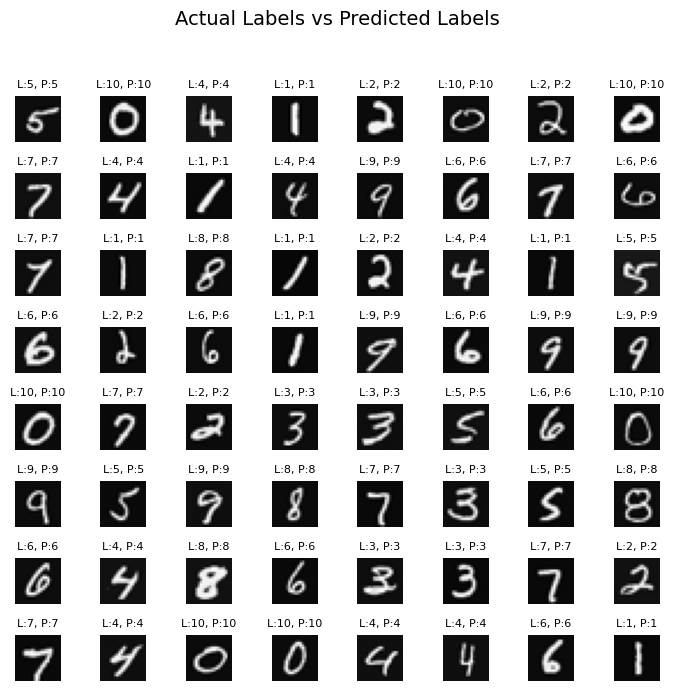

In [48]:
m = X.shape[0]
rand_indices = np.random.choice(m, 64, replace=False)

fig, axes = plt.subplots(8, 8, figsize=(7,7))
fig.suptitle("Actual Labels vs Predicted Labels", fontsize=14)

for i, ax in enumerate(axes.flat):
    idx = rand_indices[i]
    t = X[idx]  # 400 features (20x20 image)

    # Prediction
    prediction = model.predict(t.reshape(1, 400), verbose=0)  # logits
    probs = tf.nn.softmax(prediction)                        # convert to probabilities
    pred_label = np.argmax(probs)                            # highest probability
    true_label = y[idx][0]

    # Plot image
    ax.imshow(t.reshape(20,20).T, cmap='gray')

    # Show both labels

    ax.set_title(f"L:{true_label}, P:{pred_label}", fontsize=8)
    ax.set_axis_off()

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# ***Model trained successfully to recognize handwritten digits and make accurate predictions on unseen data.***
*-Rushabh Mowade*